# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a import pandas as pd
import numpy as np
import matplotlib.pyplot as plt of alphas. Next do a loop and finally compare the results.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

30
(15, 2)


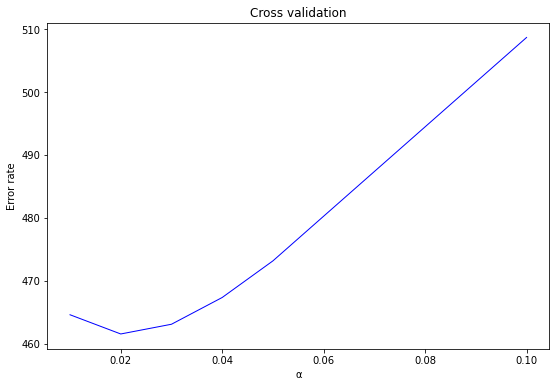

In [50]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])
print(x.size)
print(x.shape)


I = np.identity(2)
#alpha = 0.1 # change here
alphaList = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1]
#alphaList = [0.01,0.08,0.1]
# add 1-3 line of code here
# https://en.wikipedia.org/wiki/Cross-validation_(statistics)
errorList = [] 
for alpha in alphaList:
    error = 0    
    
    for i in range(x.shape[0]):

        x_in = x
        y_in = y
        x_in = np.delete(x_in, i, axis = 0)
        y_in = np.delete(y_in, i, axis = 0)
        w = np.linalg.inv(x_in.T * x_in + alpha * I) * x_in.T * y_in
        w = w.ravel()

        error += ((y - x * w.T)[i]**2)/(x.shape[0])
        
    errorList.append(error[0,0])

plt.figure(figsize=(9,6))
plt.plot(alphaList, errorList, color='blue', linewidth = 1)
plt.xlabel('α')
plt.ylabel('Error rate')
plt.title('Cross validation')
plt.show()




## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [192]:


def sgd(w,x,y,iterations):
    lr = 0.125
    normalize=np.linalg.norm(x,axis=0)
    length=normalize[0]
    step=normalize[1]**2
    wage0=w[0]
    wage1=w[1]
    
    for i in range(iterations):
            x_in=x[:,1].reshape(-1,1)
            y_pred = x_in*wage0+wage1
            delta=y-y_pred
            if wage0>0:
                deltaW= -(2*x_in.T.dot(delta))/step
            else:
                deltaW= -(2*x_in.T.dot(delta))/step
            deltab=-2*np.sum(y-y_pred)//length**2
            wage0=wage0-lr*deltaW
            wage1=wage1-lr*deltab
        
    w[1]=wage1
    w[0]=wage0
    return w


In [193]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)
x_old = x
x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha = 0.1 


w = np.linalg.inv(x.T*x + alpha * I)*x.T*y 
w=w.ravel()

print(f" Lasso equation: {w[0,1]}*x  {w[0,0]}")


Rownianie Lasso ma postac: 1.169787574869769*x  -101.72397080681458


Rownianie SGD ma postac: 1.1449659487929693*x  -97.625


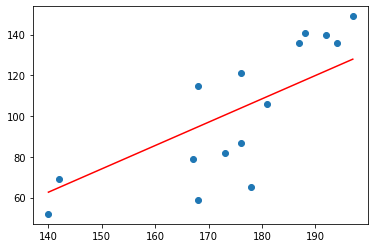

In [194]:
start_point=np.zeros((2,1))
w = sgd(start_point,x,y,1200)
w = w.ravel()
x_model = np.linspace(np.min(x_old), np.max(x_old), 1000)


y_model = [w[1] + w[0]*x for x in x_model]
 
plt.plot(x_model, y_model, c="red")
plt.scatter(x_old,y)
print(f"SGD equation: {w[0]}*x  {w[1]}")                
plt.show()   


3. Extend the Fisher's classifier

Please extend the targets of the iris_data variable and use it as the $y$.


In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

x = iris_df['sepal width (cm)'].values # change here
y = iris_df['sepal length (cm)'].values # change here

dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x




In [228]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Equation is -0.22336106112992696*x +6.5262225508945635


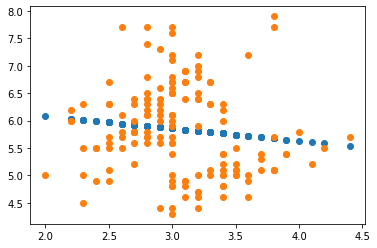

In [230]:
y_pred = a * x + b
print(f"Equation is {a}*x +{b}")
plt.scatter(x, y_pred)
plt.scatter(x,y)
plt.show()

Equation is 1.276961388661614*x +2.0828671777985313


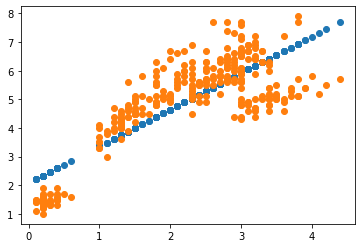

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

x = iris_df[['sepal width (cm)', 'petal width (cm)']].values # change here
y = iris_df[['sepal length (cm)','petal length (cm)']].values # change here

dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x


y_pred = a * x + b
print(f"Equation is {a}*x +{b}")
plt.scatter(x, y_pred)
plt.scatter(x,y)
plt.show()